### Histograms

- find histograms
- plot histograms
- analyze the histograms

#### Histogram:
- graph or plot which gives us an overall idea about the intensity distribution  of an image
- It is a plot with pixel values (ranging from 0 to 255) in X axis and corresponding number of pixels in the image on Y-axis
- It is an another way of understanding image
- By looking at the histogram of an image we can get intuition about contrast, brightness, intensity distribution etc of the image

#### Find histograms:

- To find histograms we use OpenCV and numpy in-built function


#### BINS

- i.e. from 0 to 255 (256 values we have)
- split whole histograms into 16 subparts and value of wach subpart is the sum of all the pixel count in it
- we need to find the number of pixels lying between 0 to 15 and 16 to 31 etc....... 240 to 255
- This each part is called BIN 
- 16 BINS are represented by the term histSize in OpenCV docs


#### DIMS
- the number of parameters for which we collect the data.
- in this case, we collect data regarding only one thing, intensity value


#### RANGE:
- Range of intensity values we want to measure.
- Normally it is [0,255] i.e. all intensity values

#### Histogram calculation

- cv2.calcHist(image, channels, mask, histSize, ranges[, hist[,accumulate]])
- parameters requires
    - images: source image of type uint8 or float 32. It should be given in a square brackets ie. [image]
    - channels: it is also given in square brackets. In this index of channel for which we calculate histogram.
        - example, if the image is gray scale image, It's value is [0]
        - if the image is color image we can pass [0], [1], or [2] to calculate histogram of blue, green or red channel respectively
    - mask: mask image. To find histogram full image, it is given as None. But if u want to find histogram of particular region of image, you can have to create a mask image ofr that and give it as mask
    - histSize: Represents our BIN count. Np need to give in square brackets.For full scale we pass [256]
    - Range: this is our RANGE normally it is [0,256]

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

hist is a 256 x 1 array.Each value corresponds to number of pixels in that image with its corresponding pixel value

In [2]:
img=cv2.imread("standard_test_images\\standard_test_images\\1.tif",0)

hist=cv2.calcHist([img], [0], None, [256],[0,256])
hist

array([[0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [1.000e+00],
       [3.000e+00],
       [8.000e+00],
       [6.000e+00],
       [8.000e+00],
       [8.000e+00],
       [1.900e+01],
       [3.800e+01],
       [4.500e+01],
       [5.700e+01],
       [7.200e+01],
       [1.050e+02],
       [1.130e+02],
       [1.400e+02],
       [1.560e+02],
       [1.910e+02],
       [1.780e+02],
       [1.800e+02],
       [1.900e+02],
       [2.300e+02],
       [2.250e+02],
       [2.280e+02],
       [2.420e+02],
       [2.500e+02],
       [2.330e+02],
       [2.650e+02],
       [2.390e+02],
       [2.710e+02],
       [2.760e+02],
       [2.400e+02],
       [2.870e+02],
       [2.870e+02],
       [2.840e+02],
       [2.800e+02],
       [3.480e+02],
       [4.370e+02],


#### Using NumPy finding histograms

- BINS will have 257 elements because numpy calculates bins 0 to 0.99, 1 to 1.99, 2 to 2.99 etc.. 

so final range would be 255 to 255.99 To represent that, they also add 256 at end of bins. 

But we don't need 256.upto 255  is sufficient

In [3]:
hist, bins=np.histogram(img.ravel(),256,[0,256])
hist

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,    3,    8,    6,    8,    8,   19,   38,
         45,   57,   72,  105,  113,  140,  156,  191,  178,  180,  190,
        230,  225,  228,  242,  250,  233,  265,  239,  271,  276,  240,
        287,  287,  284,  280,  348,  437,  462,  446,  439,  392,  460,
        539,  567,  740,  773,  895, 1093, 1146, 1143,  906,  852,  819,
        671,  590,  570,  566,  451,  359,  298,  284,  240,  190,  182,
        160,  141,  128,  145,  128,  108,  123,   99,  115,  129,  111,
        110,  120,  132,  123,  127,  109,  134,  131,  120,  129,  122,
        121,  150,  155,  163,  190,  196,  265,  350,  392,  468,  477,
        547,  484,  577,  549,  560,  560,  584,  656,  645,  608,  659,
        624,  663,  744,  866,  897,  800,  819,  783,  806,  811,  749,
        745,  621,  604,  622,  629,  643,  638,  601,  556,  504,  547,
        532,  527,  525,  544,  549,  545,  580,  5

numpy has another function

np.bincount() which is much faster than(around 10X) np.histogram()

Don't forget to set minlength=256 in np.bincount

In [4]:
hist=np.bincount(img.ravel(),minlength=256)
hist

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,    3,    8,    6,    8,    8,   19,   38,
         45,   57,   72,  105,  113,  140,  156,  191,  178,  180,  190,
        230,  225,  228,  242,  250,  233,  265,  239,  271,  276,  240,
        287,  287,  284,  280,  348,  437,  462,  446,  439,  392,  460,
        539,  567,  740,  773,  895, 1093, 1146, 1143,  906,  852,  819,
        671,  590,  570,  566,  451,  359,  298,  284,  240,  190,  182,
        160,  141,  128,  145,  128,  108,  123,   99,  115,  129,  111,
        110,  120,  132,  123,  127,  109,  134,  131,  120,  129,  122,
        121,  150,  155,  163,  190,  196,  265,  350,  392,  468,  477,
        547,  484,  577,  549,  560,  560,  584,  656,  645,  608,  659,
        624,  663,  744,  866,  897,  800,  819,  783,  806,  811,  749,
        745,  621,  604,  622,  629,  643,  638,  601,  556,  504,  547,
        532,  527,  525,  544,  549,  545,  580,  5

#### Plotting Histograms:

- using matplotlib 
- using OpenCV drawinf funcitons

#### 1. Using matplotlib

- we have default function: matplotlib.pyplot.hist()
- It directly finds the histogram and plot it.We need not use calcHist() or np.histogram() funtion to find the histogram

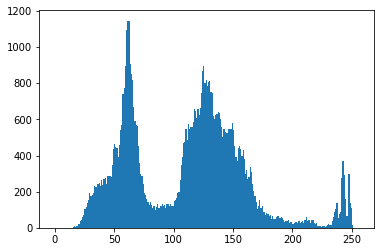

In [5]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

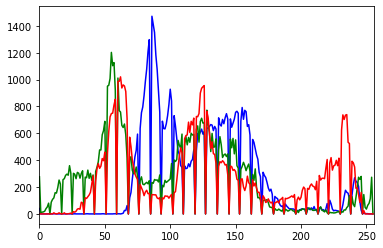

In [6]:
img=cv2.imread("standard_test_images\\standard_test_images\\1.tif")
color=('b','g','r')
for i,col in enumerate(color):
    hist=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=col)
    plt.xlim([0,256])
plt.show()

#### Using OpenCV :
- adjust the values of histograms along with its bin values to look like x,y coordinates so that we can draw it using cv2.line() or cv2.polygone() function.


#### Application MAsk:
- cv2.calcHist() used to find histogram of the full image.
- but if we want to find histograms of some regions of an image? 
    - just we create a mask image with white color on the region we want to find histogram and black otherwise
    - then pass the mask

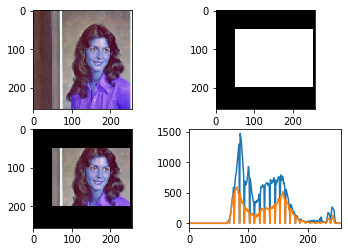

In [7]:
img=cv2.imread("standard_test_images\\standard_test_images\\1.tif")

# creating mask
mask = np.zeros(img.shape[:2],np.uint8)
mask[50:200, 50:250]=255
masked_img=cv2.bitwise_and(img,img,mask=mask)

# calculating histogram with and without mask
hist_full=cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask=cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img,'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img,'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


### Histogram equilization:

- improves the contrast of the image
- This method usually increases the global contrast of many images, especially when the usable data of the image is represented by close contrast values. 
- Through this adjustment, the intensities can be better distributed on the histogram. This allows for areas of lower local contrast to gain a higher contrast. 
- Histogram equalization accomplishes this by effectively spreading out the most frequent intensity values.

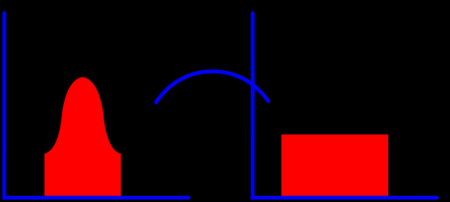

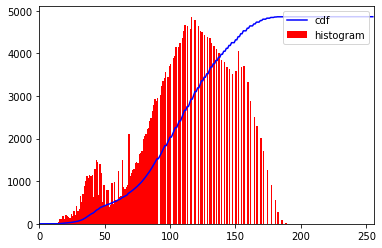

In [8]:
img=cv2.imread("standard_test_images\\standard_test_images\\dark.png",0)

hist,bins=np.histogram(img.flatten(),256,[0,256])
cdf=hist.cumsum()
cdf_normalization=cdf*hist.max()/cdf.max()

plt.plot(cdf_normalization,color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper right')
plt.show()

cumsum()

Return the cumulative sum of the elements along the given axis.

Refer to `numpy.cumsum` for full documentation.


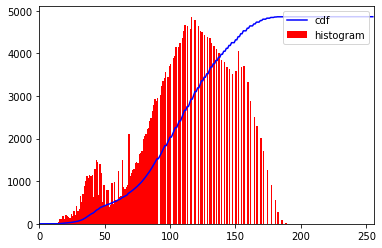

In [9]:
img=cv2.imread("standard_test_images\\standard_test_images\\dark.png",0)

hist,bins=np.histogram(img.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalization=cdf*hist.max()/cdf.max()

plt.plot(cdf_normalization,color='b')
plt.hist(img.ravel(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper right')
plt.show()

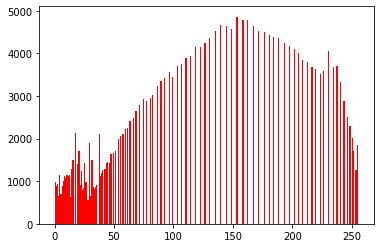

In [10]:
# histogram equalization
cdf_mask=np.ma.masked_equal(cdf,0)
cdf_mask=(cdf_mask-cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
cdf=np.ma.filled(cdf_mask,0).astype('uint8')
img1=cdf[img]

plt.hist(img1.ravel(),256,[0,256],color='r')
plt.show()

cv2.imshow("img",img)
cv2.imshow("img1",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

cdf -> Cumulative distribution function

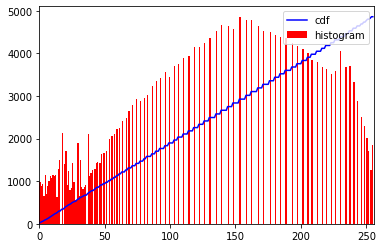

In [11]:

hist,bins=np.histogram(img1.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalization=cdf*hist.max()/cdf.max()

plt.plot(cdf_normalization,color='b')
plt.hist(img1.ravel(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper right')
plt.show()

### Histogram Equalization using OpenCV

- we have default function in OpenCV
    - cv2.equalizeHist()
    
- input
    - grayscale image
- output
    - histogram equalized image

In [12]:
img=cv2.imread("standard_test_images\\standard_test_images\\dark.png",0)
equ=cv2.equalizeHist(img)
cv2.imshow("img",img)
cv2.imshow("equi",equ)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### CLAHE (Contrast Limited Adaptive Histogram Equalization)
- the above equalization is not correct in all cases.It is not a good idea

For example,

execute the below code

In [13]:
img=cv2.imread("standard_test_images\\standard_test_images\\balls.tiff",0)
equ=cv2.equalizeHist(img)
cv2.imshow("img",img)
cv2.imshow("equi",equ)
cv2.waitKey(0)
cv2.destroyAllWindows()

It is true that contrast has improved after histogram equalization. 

But compared to original image, histogram equalizeed image is not clear and effective. (over dark color)

- To solve this problem we use Adaptive Histogram equalization
    - In this image is divided into small bocks called 'tiles' (tileSize is 8 x 8 in OpenCV)
    - Then each of these blocks are histogram equalized as usual.
    - So in small area, histogram would confine to a small region (unless their is noise)
    - If noise is their it will be amplified
    - To avoid this, contrast limiting is applied.
    - If any histogram bin is above the specified contrast limit (40 is default in OpenCV) those pixels are clipped and distributed uniformly to other bins before applying histogram equalization
    - After equalization, to remove artifacts in tile borders, bilinear interpolation is applied

In [14]:
clahe=cv2.createCLAHE(2.0,(8,8))
ada=clahe.apply(img)
cv2.imshow("img",img)
cv2.imshow("ada",ada)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 2D Histograms

- Above we calculated and plotted 1D histogram. It is called 1D because we are taking only one feature into our consideratio. i.e. gray scale intensity value of the pixel

- But in 2D histograms we will consider two features. Normally it is used for finding color histograms where two features are Hue and Saturation values

##### Hue:

- hue of a color pixel is one of the very fundamental concepts in digital image processing. Along with saturation and brightness (brilliance), hue makes up the three basic aspects of any color.
- A pure hue is completely saturated, meaning no white light is added.


##### Saturation:
- intensity of color in an image
- saturated images has overly bright colors
- using graphics editing program we can increase saturation on under exposed images or vice versa
- it is the perceived intensity. In  other words it is a value of how dominant the color is or how colorful the object looks

##### 2D histogram in OpenCV

- we will use same function cv2.calcHist()

- for color histograms we need to convert hte images from BGR to HSV 

###### parameters:

- channeks = [0,1] because we need to process the both Hue and Saturation plane
- bins = [180,256] 180 becuase Hue plane and 256 for Saturation plane
- range = [0, 180, 0, 256] Hue value lies between 0 and 180  & Saturation lies between 0 and 256 

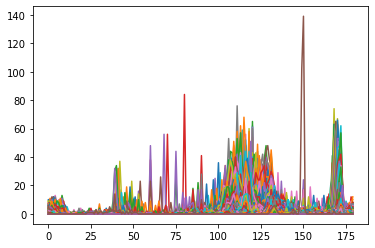

In [15]:
img=cv2.imread("standard_test_images\\standard_test_images\\1.tif")
img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist=cv2.calcHist([img], [0,1], None, [180,256], [0,180,0,256])

plt.plot(hist)
#plt.xlim([0,256])
plt.show()

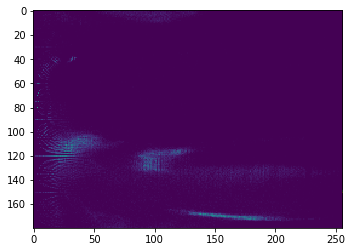

In [16]:
plt.imshow(hist,interpolation='nearest')
plt.show()

#### 2D histogram in NymPy
- In NumPy we have specific function for 2D histogram
- numpy.histogram2d()

##### parameters:
- hue plane
- saturation plane
- number of bins
- their ranges

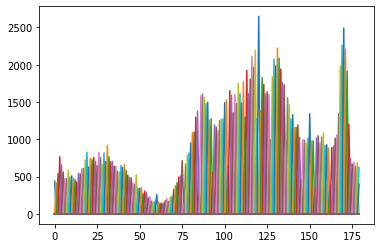

In [17]:
hist,xbins,ybins=np.histogram2d(img.ravel(),img.ravel(),[180,256],[[0,180],[0,256]])
plt.plot(hist)
plt.show()

### Histogram Back projection:
- proposed by Michael J.Swain, Dana H.Ballard in their paper Indexing via Color histograms

##### What is Histogram backprojection?
- Used for image segmentation or finding objects of interest in an image
- it creates an image of the same size as that of our input image, where each picel corresponds to the probability of that pixel belonging to our object
                     or
- the output image will have our object of interest in more white compared to remaining part.



##### How do we do it?

- first create a histogram of an image containing our object of interest
- the object fill the image as far as possible for better results
- color histogram is preferred over gray scale histogram because color of the object is more better way to define the object tthan its grayscale intensity
- then back-project" this histogram over our test image where we need to find the object

In [18]:
#Algorithm in NymPy

roi=cv2.imread("standard_test_images\\standard_test_images\\1.tif")
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
target=

SyntaxError: invalid syntax (<ipython-input-18-510f75459ae4>, line 5)